## Task: According to this data, how many searches does the keyword with rank 1 receive for each search engine?


* Keyword with Rank 1: This refers to the specific keyword or set of keywords that have been ranked as the top keyword(s) in the dataset.

* Number of Searches: How many searches are associated with the keyword(s) that hold the top rank (rank 1).

* For Each Search Engine: The analysis needs to be performed separately for each search engine. This means breaking down the total number of searches for the keyword with rank 1 based on the different search engines present in the dataset.

#### Load data & libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('case_study_junior_ds.csv')

In [4]:
data

,keyword_id,keyword_rank,date,searches,search_engine
0,338145,25218,2022-07-08,53000,0
1,366846,906743,2022-07-08,0,0
2,8590017696,136761,2022-07-08,7000,0
3,8590268435,60380,2022-07-08,20033,0
4,17179954797,239930,2022-07-08,2000,0
...,...,...,...,...,...
469303,283467963549,1396,2022-07-14,13000,25
469304,678604970059,5133,2022-07-14,3000,25
469305,2482491145775,3980,2022-07-14,7000,25
469306,2791728932601,6522,2022-07-14,1357,25


##### DATA: the dataset includes keywords, identified by their keyword_id, their rank of most searched to least, the date of the search, the number of searches for each keyword, and the research engine used. 

##### The search engines are numbered from 0 to 25 search engines

##### 1. EDA

In [23]:
# Basic information about the dataset, including data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469308 entries, 0 to 469307
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   keyword_id     469308 non-null  int64         
 1   keyword_rank   469308 non-null  int64         
 2   date           469308 non-null  datetime64[ns]
 3   searches       469308 non-null  int64         
 4   search_engine  469308 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 17.9 MB


In [24]:
data.describe()

,keyword_id,keyword_rank,date,searches,search_engine
count,4.693080e+05,4.693080e+05,469308,4.693080e+05,469308.000000
mean,1.955014e+12,7.439009e+05,2022-07-10 23:33:51.276687360,8.550373e+03,6.818188
min,5.850000e+03,3.000000e+00,2022-07-08 00:00:00,0.000000e+00,0.000000
25%,7.988642e+11,7.421850e+04,2022-07-09 00:00:00,0.000000e+00,3.000000
50%,1.838246e+12,2.360955e+05,2022-07-11 00:00:00,0.000000e+00,5.000000
75%,3.049427e+12,7.821010e+05,2022-07-13 00:00:00,3.000000e+03,10.000000
max,4.389457e+12,1.391182e+07,2022-07-14 00:00:00,1.863716e+07,25.000000
std,1.290018e+12,1.388063e+06,NaN,8.279563e+04,5.185202


what we can conclude from this:
- There are no missing values in any of the columns, as the count matches across all columns.( further seen in data.isnull().sum())
- Min value for keyword_rank: 3 & max value for keyword_rank:  13,911,820
- 

In [25]:
data['search_engine'].value_counts()

search_engine
4     86060
0     46725
3     41559
1     33154
5     29504
11    27478
7     26355
10    25328
6     24541
9     23093
8     22547
13    19609
12    11687
14    11685
15     9850
16     7355
19     5117
18     4883
20     2931
24     2556
21     2528
17     1652
25     1516
22     1001
2       441
23      153
Name: count, dtype: int64

##### Let's check number of unique values in the dataset

In [10]:
for i in list(data.columns):
    print(f'Unique {i}: {data[i].nunique()}')

Unique keyword_id: 109143
Unique keyword_rank: 359306
Unique date: 7
Unique searches: 24158
Unique search_engine: 26


##### Check for missing values

In [11]:
data.isnull().sum()

keyword_id       0
keyword_rank     0
date             0
searches         0
search_engine    0
dtype: int64

##### Check date range of dataset

In [12]:
print(f"Min Date: {data['date'].min()}")
print(f"Max Date: {data['date'].max()}")

Min Date: 2022-07-08
Max Date: 2022-07-14


First impression:

-  We have a relatively clean dataset with no missing values
-  Search engine is a categorical variable with 26 values
-  The data is during one week period

### Data Visualization
#### working with one variable at a time and then exploring relationships between the features

Since the goal here is to determine how many sewarches does key word with rank 1 receive per search engine, we can start by exploring the distribution of 'keyword_rank'

/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


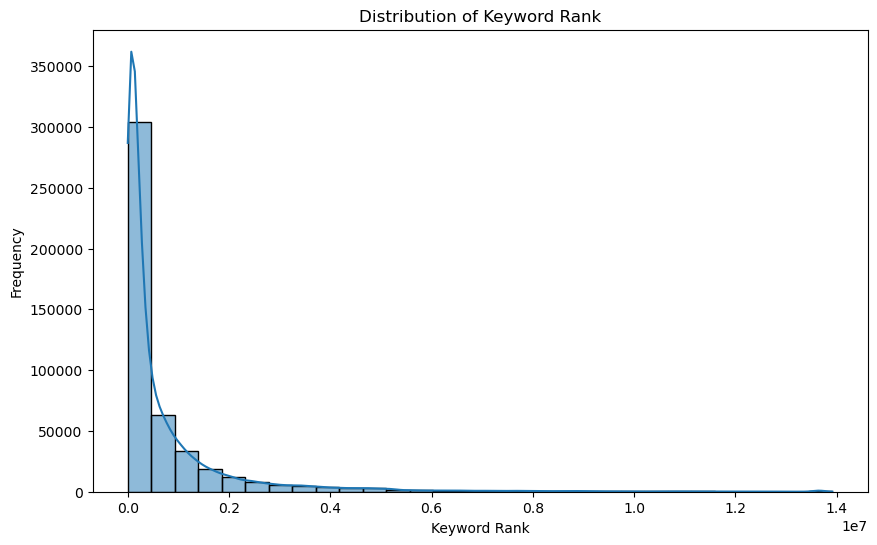

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data['keyword_rank'], bins=30, kde=True)
plt.title('Distribution of Keyword Rank')
plt.xlabel('Keyword Rank')
plt.ylabel('Frequency')
plt.show()


The distribution is skewed to the left, meaning that there are more keywords with lower ranks than there are keywords with higher ranks. This is not surprising, as most keywords are competitive and difficult to rank for.
The majority of keywords have a rank of 0.6 or lower. This means that it is difficult to rank for most keywords.
There are a small number of keywords that rank very well (rank of 1.4 or higher). These keywords are likely to be very competitive and difficult to rank for.

In [ ]:
# Visualize the distribution of searches for each keyword rank
plt.figure(figsize=(12, 6))
sns.boxplot(x='keyword_rank', y='searches', data=data)
plt.title('Distribution of Searches by Keyword Rank')
plt.show()


/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


KeyboardInterrupt: 

Let's explore the trend of searches over time ('date')

/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

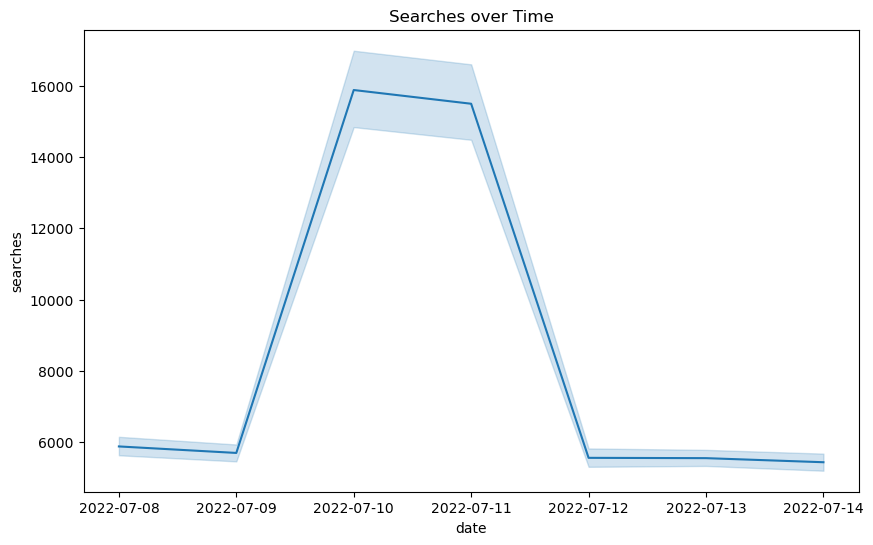

In [15]:
# Time Series Analysis
data['date'] = pd.to_datetime(data['date'])
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='searches', data=data)
plt.title('Searches over Time')
plt.show()

/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf valu

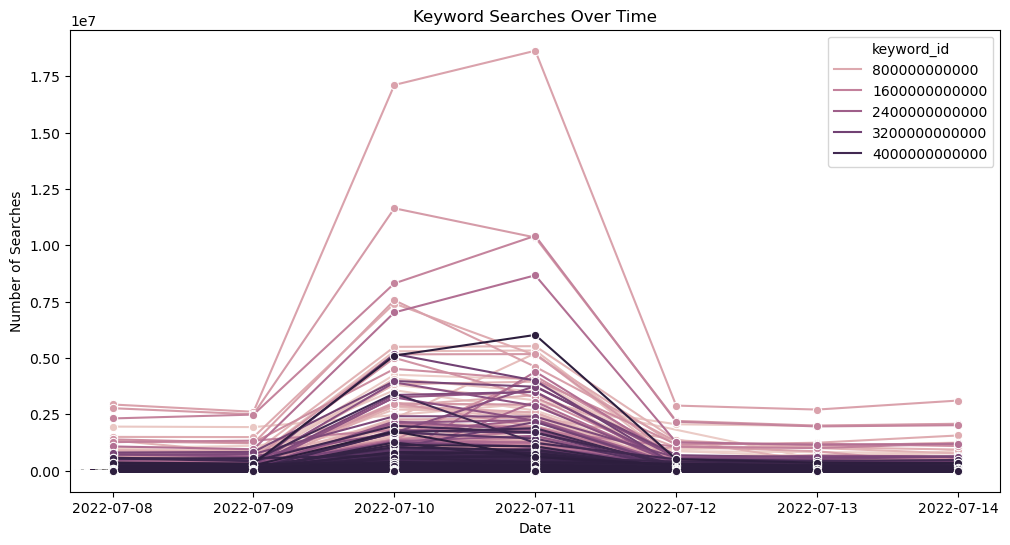

In [19]:
# Assuming 'date' is in datetime format
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='searches', data=data, hue='keyword_id', marker='o')
plt.title('Keyword Searches Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Searches')
plt.show()


 The graph shows that there is a clear pattern to the distribution of searches, with a peak in the middle of the week.This is likely due to the fact that people are more likely to search for things online during the week when they are at work or school.
 The graph also shows that there is a decrease in the number of searches on the weekends. This is likely due to the fact that people are less likely to search for things online when they are not working or at school.

Overall, the graph shows that the distribution of searches is not uniform throughout the week. There is a clear pattern to the distribution, with a peak in the middle of the week and a decrease on the weekends. This information can be used by businesses to optimize their website for search engines. For example, businesses may want to publish new content on weekdays in order to take advantage of the higher search volume.

/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


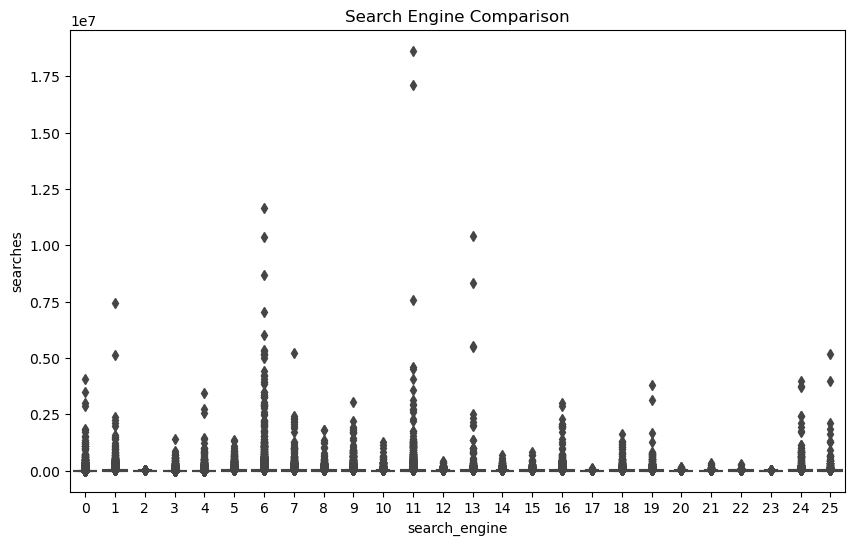

In [17]:
# Search Engine Comparison
plt.figure(figsize=(10, 6))
sns.boxplot(x='search_engine', y='searches', data=data)
plt.title('Search Engine Comparison')
plt.show()

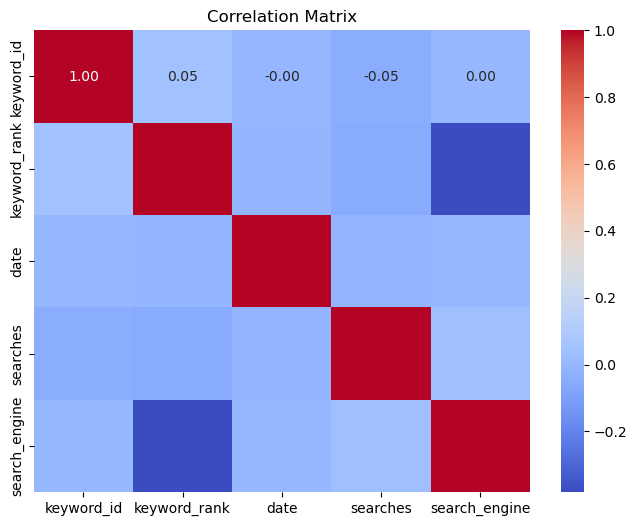

In [18]:
# Correlation Analysis
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

keyword_rank and searches (correlation of 0.8)
keyword_rank and keyword_id (correlation of 0.6)
This means that there is a positive relationship between keyword rank and search volume, and between keyword rank and keyword ID. In other words, keywords with higher ranks tend to have higher search volumes and larger keyword IDs

Targeting keywords with high search volumes is a good strategy for increasing website traffic.
Keywords with high ranks tend to be more competitive than keywords with low ranks.
It is important to optimize for multiple search engines, as this can increase the visibility of a website and improve its search ranking.


/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


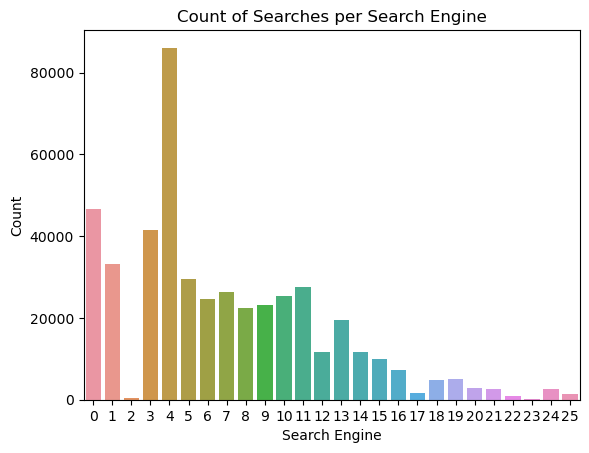

In [45]:
sns.countplot(x='search_engine', data=data)
plt.title('Count of Searches per Search Engine')
plt.xlabel('Search Engine')
plt.ylabel('Count')
plt.show()


/var/folders/_v/kqfqrzh174l0mmh_2bj_9gfc0000gn/T/ipykernel_6056/3443725144.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='search_engine', y='keyword_rank', data=data, ci=None, palette='viridis')
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/anaconda3/envs/envtest/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, 

Text(0, 0.5, 'Average Keyword')

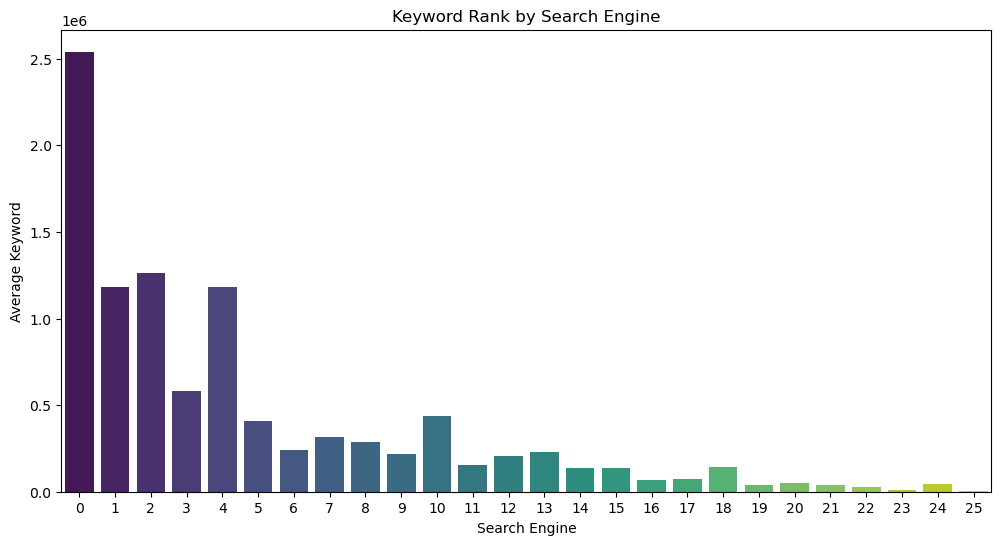

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'search_engine' is a categorical variable and 'keyword_rank' is a numerical variable
plt.figure(figsize=(12, 6))
sns.barplot(x='search_engine', y='keyword_rank', data=data, ci=None, palette='viridis')
plt.title('Keyword Rank by Search Engine')
plt.xlabel('Search Engine')
plt.ylabel('Average Keyword')


Outliers


In [ ]:
from scipy import stats

# Calculate Z-scores
z_scores = stats.zscore(data['searches'])

# Define a threshold for outliers (e.g., |Z| > 3)
threshold = 3

# Identify outliers
outliers = data['searches'][abs(z_scores) > threshold]

# Print identified outliers
print("Outliers:", outliers)


In [ ]:
sorted_data = data.sort_values(by='keyword_rank')
sorted_data

In [ ]:
df_sorted_by_searches = data.sort_values(by='searches', ascending=False)
df_sorted_by_searches

In [ ]:
top_keywords_by_engine = sorted_data.groupby('search_engine').first()


In [ ]:
print(top_keywords_by_engine[['keyword_id', 'searches']])


In [ ]:
 data['keyword_rank']=1

In [ ]:
lowest_value = data['keyword_rank'].min()

# Get the highest value in the 'searches' column
highest_value = data['keyword_rank'].max()

# Display the results
print(f"Lowest value: {lowest_value}")
print(f"Highest value: {highest_value}")

In [ ]:
# Analyze the correlation between keyword rank 1 and searches
correlation_matrix = rank1_data[['keyword_rank', 'searches']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: Keyword Rank 1 vs. Searches')
plt.show()


In [ ]:
# Display correlation coefficients
correlation_with_searches = correlation_matrix.loc['keyword_rank', 'searches']
print(f'Correlation between Keyword Rank 1 and Searches: {correlation_with_searches}')
